# Does a Rising Tide Always Lift a Boat? 

This analysis will explore the relationship between average individual happiness (further referred to as happiness), an average individual's wealth (referred to as wealth), and, economic equality (referred to as equality) on a country by country basis. 

It has been previously shown that rising wealth has a positive relationship with happiness. First this analysis will present that relationship. Then, it will look at the relationship between equality and happiness. It will then explore two questions:

1- Whether there is a point at which increases to wealth give diminishing returns to happiness, and

2- Whether there is a point at which equality has a stronger relationship to happiness. 


## Data

4 years worth of data will be looked at, from 2015 to 2018 inclusive. 

Wealth will be measured by GDP per capita in USD. This a country's total economic output in a given year divided by number of citizens. It is regularly used by economists as a measure of a country's prosperity. 

Equality data is measured by GINI coefficient values. This measures how unequally income was distributed amongst citizens in a country. A GINI coefficient is between 0 and 1. A GINI coefficient of 1 indicates complete inequality (ie, one person takes 100% of the income in a given country), and a coefficient of 0 indicates complete equality (ie, income is equally distributed amongst all citizens). 


These coefficients have been slightly modified in this analysis. They have been multiplied by -100 and then increased by 100 for the sake of ease of displaying the data. This means that as values rise from 0 to 100, a country has higher equality.

Both of the above have been sourced from the World Bank.


Happiness values are sourced from data from the Sustainable Solutions Network. These are numbers from 1-10 where thousands of respondants from countries are asked to rate their own lives between 0 (imagining the worst possible life for themselves) and 10 (imagining the best possible lives for themselves). Their reports have been presented to and used by the United Nations since 2012. Further information can be found at their website. https://worldhappiness.report/

These measurements have not been available for every country for every year. Only complete observations have been included. Therefore each data set contains around 60-70 data points. 

## Measuring Strength of Relationships

As we will be looking for the strength of linear relationships, we will use the R value to measure strength. R values lie between -1 and 1. A value of -1 means a perfect negative relationship. A value of 1 indicates a perfect positive relationship, and a value of 0 means there is no relationship at all. 

In physical sciences with less complex and temperamental subjects, very high R values or R^2 values are to be required. We are dealing with social science data with relatively limited numbers of points, so we will be accepting lower R values when determining correlations. 





## Code Used

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure 

import seaborn as sns
sns.set()

In [2]:
#data imports 
df_2016 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Cleaned Data/Cleaned with Python/Merged_2016_Cleaned.csv")
df_2017 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Cleaned Data/Cleaned with Python/Merged_2017_Cleaned.csv")
df_2018 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Cleaned Data/Cleaned with Python/Merged_2018_Cleaned.csv")
df_2015 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Cleaned Data/Cleaned with Python/Merged_2015_Cleaned.csv")

df_aggregate = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Cleaned Data/Cleaned with Python/Aggregate_Cleaned.csv")


In [3]:
def gdpGraph(data): 
    
    GDP = data['GDP']
    HAP = data['Happiness Score']
    
    plt.figure(figsize=(15,10))
    sns.regplot(x=GDP, y=HAP)
            
    plt.title("Individual Wealth and Happiness", fontsize = 25)
    plt.xlabel("Wealth",fontsize = 15)
    plt.ylabel("Happiness",fontsize = 15)
    
    rValue = round(stats.linregress(GDP, HAP).rvalue,2)    
    plt.annotate(f'R value = {rValue}', xy = (0.069,0.79), xycoords = 'figure fraction', fontsize = 20)
        
    plt.show
    return  
    

In [4]:
def giniGraph(data): 
    
    GINI = data['GINI']
    HAP = data['Happiness Score']
    
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=GINI, y=HAP, ci=None)
    
    plt.title("Equality and Happiness", fontsize = 30)
    
    plt.xlabel("Equality",fontsize = 15)
    
    plt.ylabel("Happiness",fontsize = 15)
        
    rValue = round(stats.linregress(GINI,HAP).rvalue,2)
    plt.annotate(f'R value = {rValue}', xy = (0.069,0.79), xycoords = 'figure fraction', fontsize = 20)
    
    plt.show
    return  

In [5]:
def rValueGraph(data):
    data = createRValues(data) 
    data = data.rename(columns={'rValueGINI':'Equality R Value', 'rValueGDP': 'Individual Wealth R Value'} )
    
    plt.figure(figsize=(15,10))
    plt.ylabel("R Values",fontsize = 15)
    plt.xlabel("GDP",fontsize = 15)
    plt.title("Wealth and Equality R values against Happiness Over a Certain Level of Wealth", fontsize = 25)
    
    plt.axhline(y=0, color='m', linestyle='--')
    
    sns.lineplot(x='GDP', y='value', hue='variable', 
             data=pd.melt(data, ['GDP']))
    plt.show()
    

In [6]:
def createRValues(data): 
    data = data.sort_values(by= ['GDP']) 
    frame = pd.DataFrame()
    
    # R values become less useful with less data points. Let's not bother looking at them under 5
    while(len(data['GDP']) > 5): 
        
        GDP = data['GDP']
        HAP = data['Happiness Score']
        GINI = data['GINI']
        rValueGDP = stats.linregress(GDP, HAP).rvalue
        rValueGINI = stats.linregress(GINI, HAP).rvalue
    
        frame = frame.append({
            'GDP':data['GDP'].min(),
            'rValueGDP':rValueGDP,
            'rValueGINI':rValueGINI
            }, ignore_index = True)
        
        data = data.iloc[1:, :]
        
    return frame 
        


In [7]:
def GDPInterceptPoint(data):
    
    for index, row in data.iterrows():
        
        if row['rValueGINI'] <= row['rValueGDP']:
            data = data.iloc[1:, :]
            
        else: 
            break
            
    print(f"There are {len(data['GDP']) + 5} countries for which equality provides a stronger R value for happiness")
    print(f"The minimum individual wealth in this set of countries is {data['GDP'].min()}")
    
    return data['GDP'].min()

In [8]:
def giniInterceptGraph(data): 
    
    i = GDPInterceptPoint(createRValues(data))
    data = data[data.GDP >=i] 
       
    GINI = data['GINI']
    HAP = data['Happiness Score']
    COU = data['Country Code']
    GDP = data['GDP']
        
    plt.figure(figsize=(15,10))
       
    sns.scatterplot(x=GINI, y=HAP, hue = GDP, size=GDP)
    
    plt.title("Equality and Happiness at R Intercept Point", fontsize = 30)
    
    plt.xlabel("Equality",fontsize = 15)
    
    plt.ylabel("Happiness",fontsize = 15)
    
    rValue = round(stats.linregress(GINI, HAP).rvalue,2)
    
    plt.annotate(f'R value = {rValue}', xy = (0.069,0.1), xycoords = 'figure fraction', fontsize = 20)
    
    try:
        for i in range(len(COU)):
            plt.annotate(f'{COU[i]}' , (GINI[i], HAP[i] + 0.02))
        
    except:
        print("there's some janky shit here sometimes")
        
    finally:
        plt.show


In [9]:
def graphBundle(data):
    gdpGraph(data);
    giniGraph(data);
    rValueGraph(data);
    giniInterceptGraph(data);

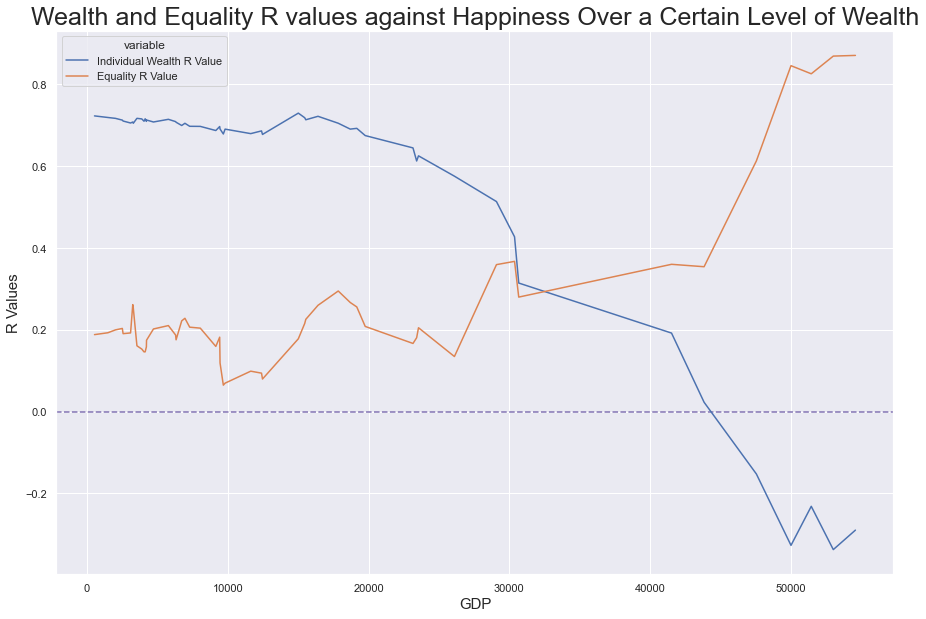

In [10]:
rValueGraph(df_2018)

### Analysis for 2015 data

First, lets look at the relationship between wealth and happiness for 2015 in a scatter plot.

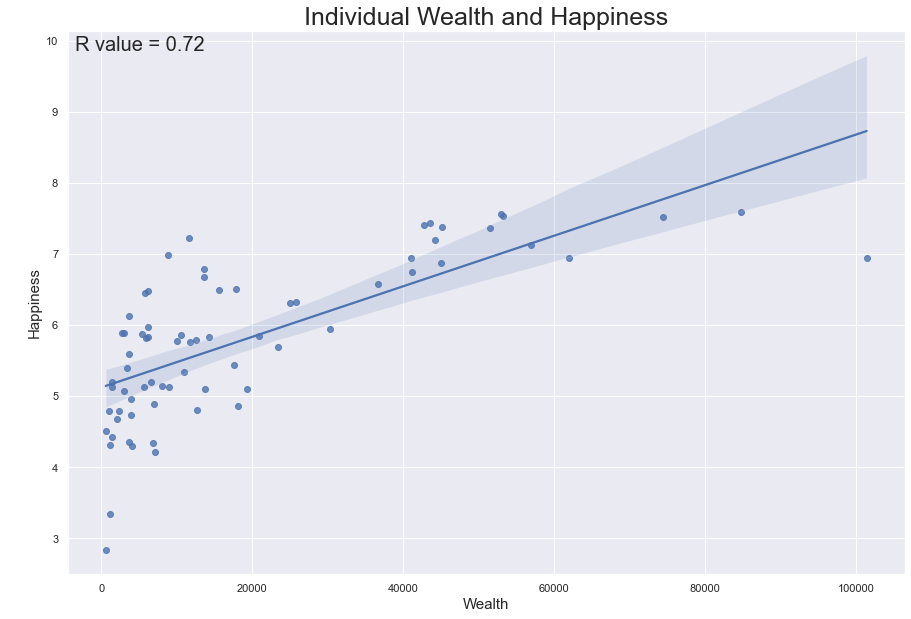

In [11]:
gdpGraph(df_2015)

We can see a strong positive relationship with an R value of 0.72 between wealth and happiness. However, looking at the plot, we can see a sharp initial increase of happiness as wealth increases, but it appears to soften out relatively quickly. Now lets look at a scatter plot of equality and happiness.

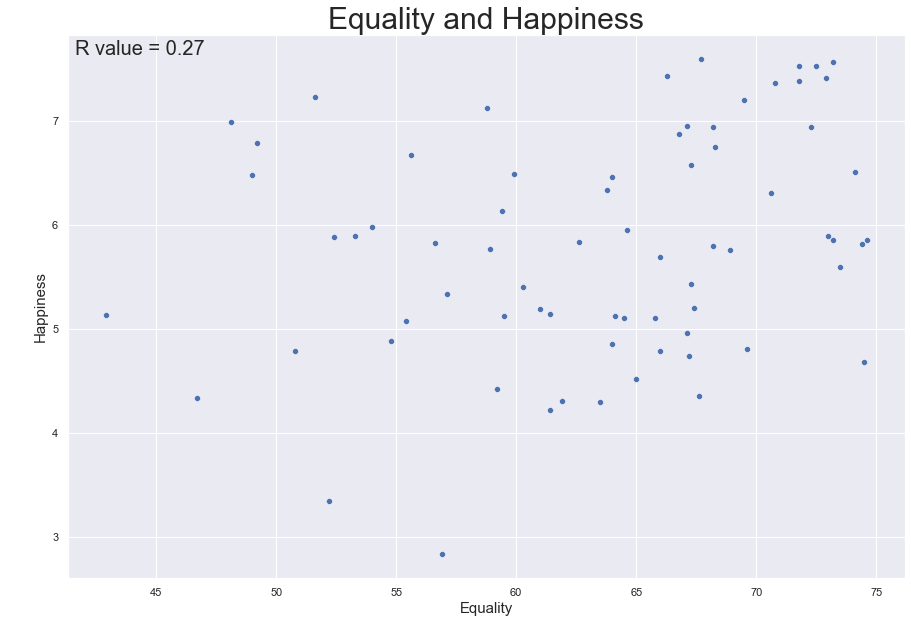

In [12]:
giniGraph(df_2015)

A low, if any correlation. At this point it is definitely safe to say that rising wealth has a stronger relationship to happiness than rising equality. 

Let's start removing lower wealth values from our data set, and see if we start to calculate a stronger correlation between equality and happiness at higher wealth levels. 

The following multi-line graph shows the R values of wealth and equality against happiness where only countries with wealth above a certain point are included in the analysis.

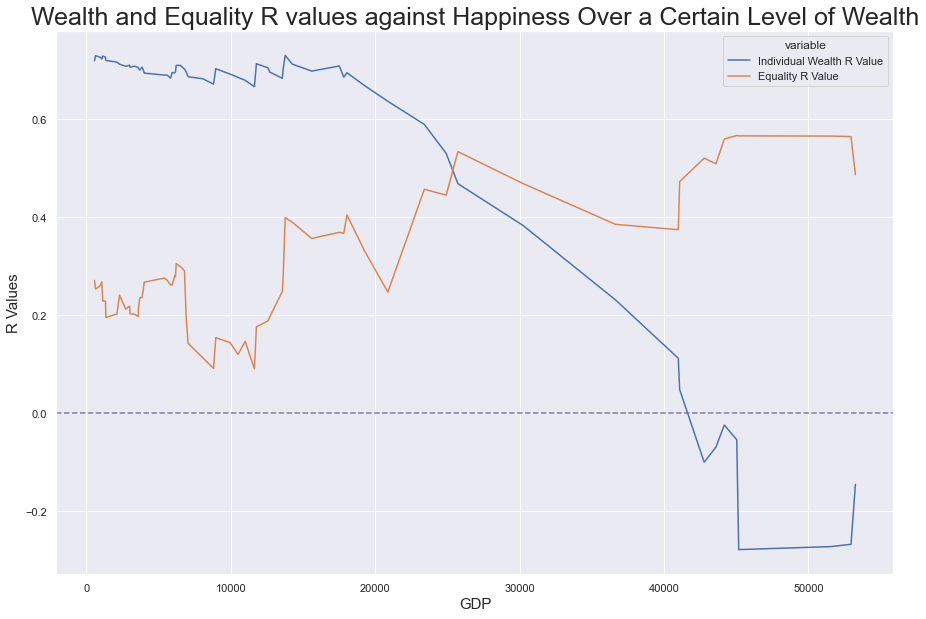

In [13]:
rValueGraph(df_2015)

We can see that at around 20k, the R value of wealth to happiness starts decreasing. We also see the R value of equality to happiness rising, creating an intercept point at around 25k. From this intercept point, the R values indicate that equality is a stronger positive indicator for happiness. 

Even more interesting is the R value of wealth to happiness actually becomes negative- note the line at 0. This suggests that not only does increasing wealth have diminishing returns for happiness as wealth gets higher, it actually seems to have an adverse effect. 

The R value for wealth and happiness past this point remains relatively weak, but we will keep an eye on it for other years. 

It's worth noting here that in building this graph, data points have been removed from left to right as more countries are excluded. The rightmost point contains only 5 data points. 

Lets have a look at equality versus happiness at the intercept point above. 

There are 18 countries for which equality provides a stronger R value for happiness
The minimum individual wealth in this set of countries is 25732.01836


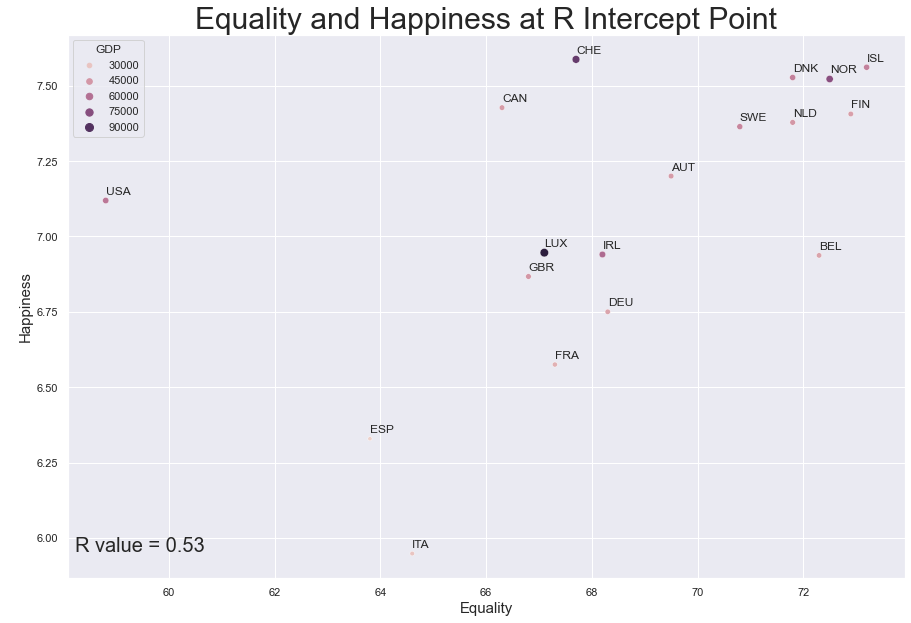

In [14]:
giniInterceptGraph(df_2015)

This scatter plot shows the countries where equality is starting to be more salient to happiness. We can see 13 data points. Wealth is still visualised in point size and colour.

To talk about individual points, we can see Belgium, France and Germany following the general trend despite having similar wealth. We can also see a very tight cluster around a straight line between Great Britain and Iceland containing a variety of wealth values. Very notably, we have Luxemberg with an extremely high individual wealth at the low end of this line. 

Outliers of the USA and Switzerland may be buoyed by high wealth, which at this point still has a notable R value to happiness.  

It is worth noting that the bottom of the y axis is not 0. Happiness here does not drop below 6/10, but there is still a range between 6 and 7.7 to consider. 



We will generate the same visualisations for other years to check for consistent results before jumping into further discussion

## Visualisation of 2016 Data

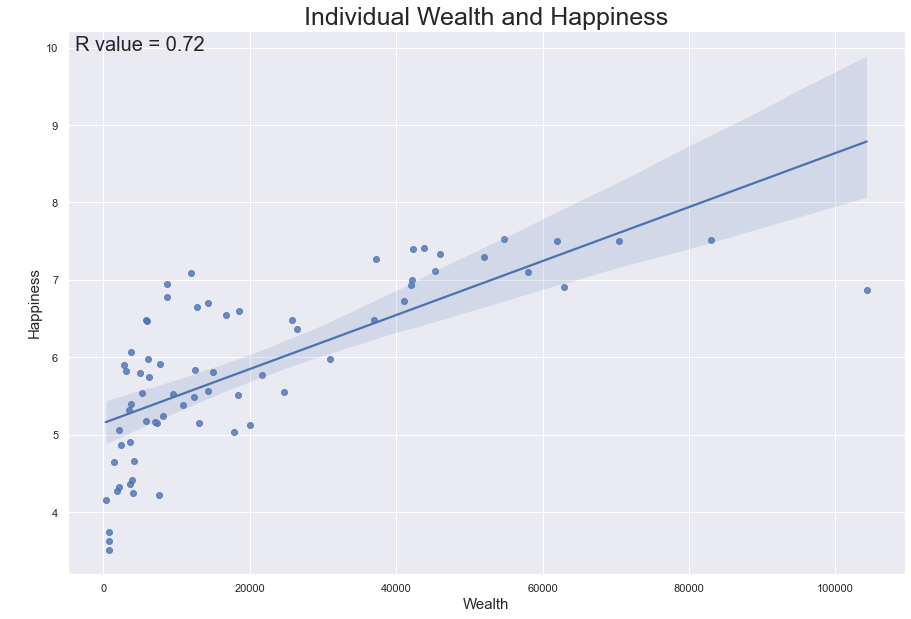

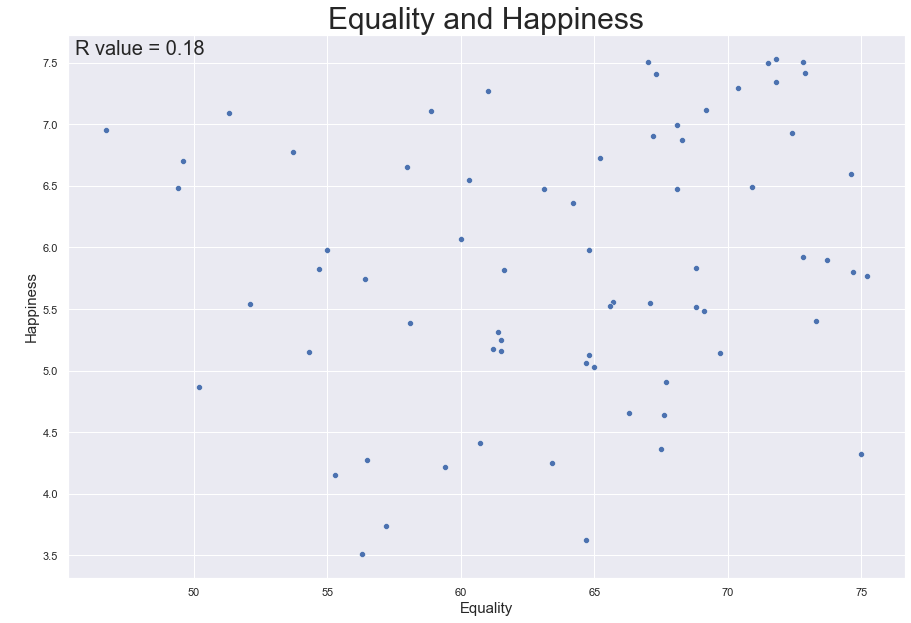

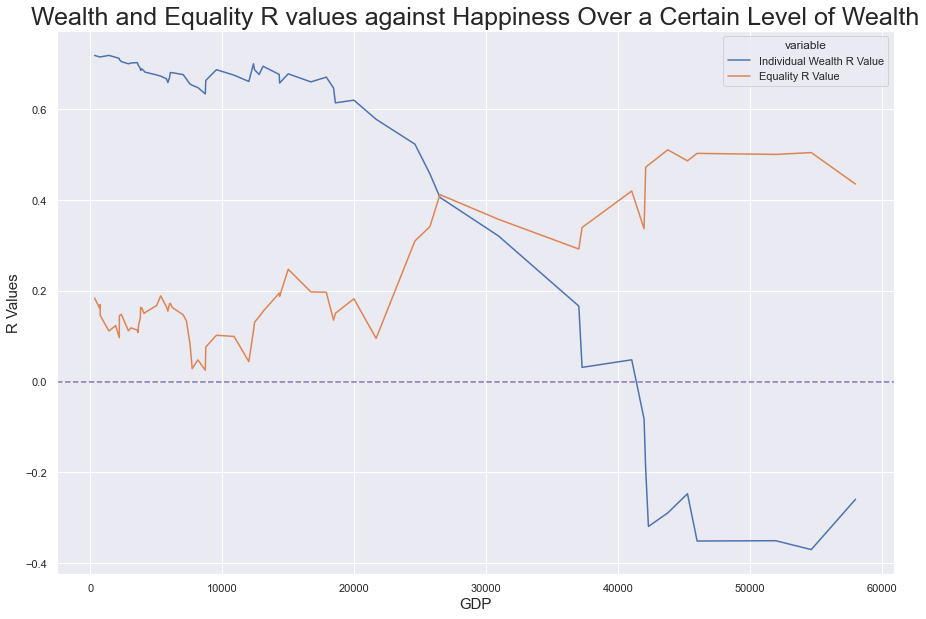

There are 19 countries for which equality provides a stronger R value for happiness
The minimum individual wealth in this set of countries is 26505.34322


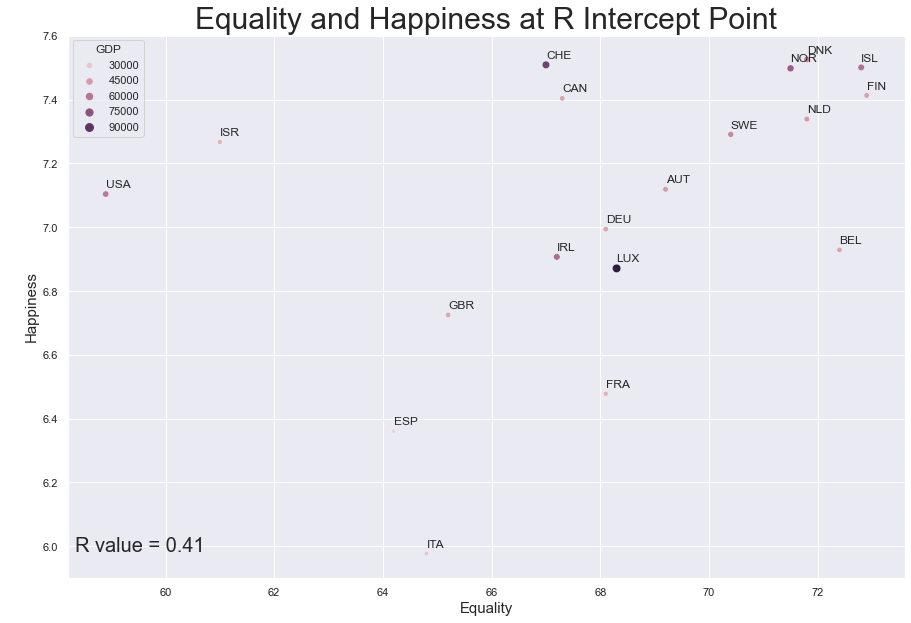

In [15]:
graphBundle(df_2016)

## Visualisation of 2017 Data

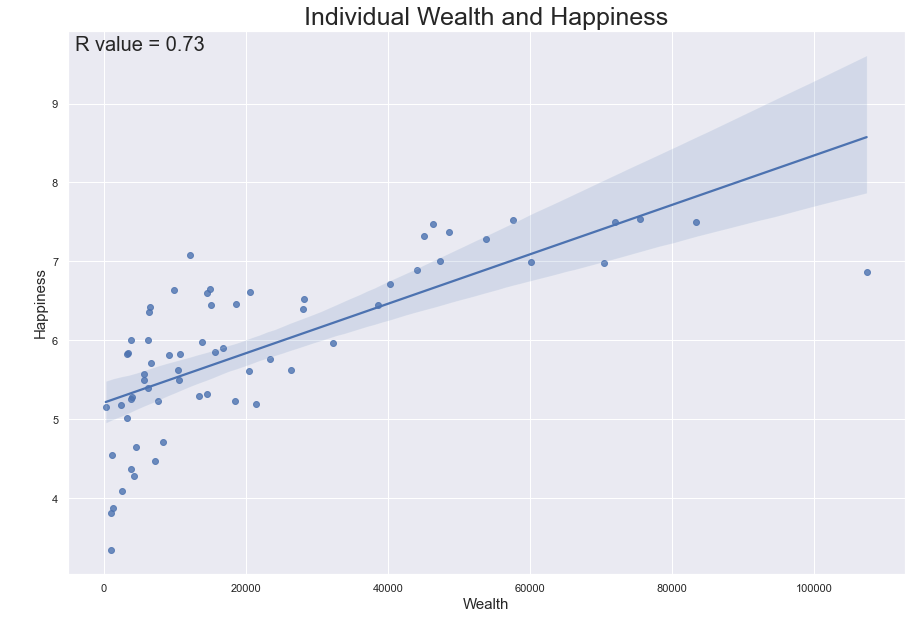

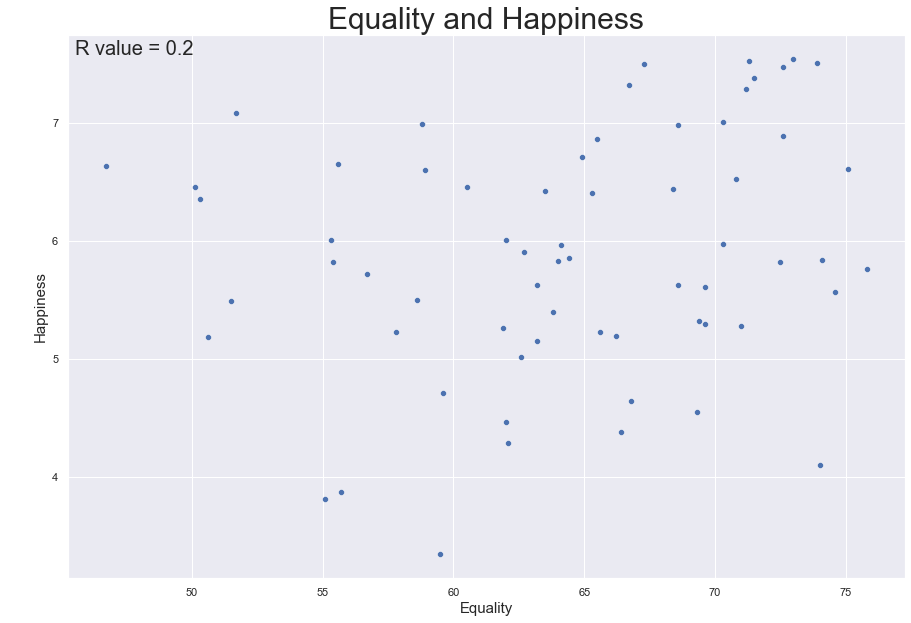

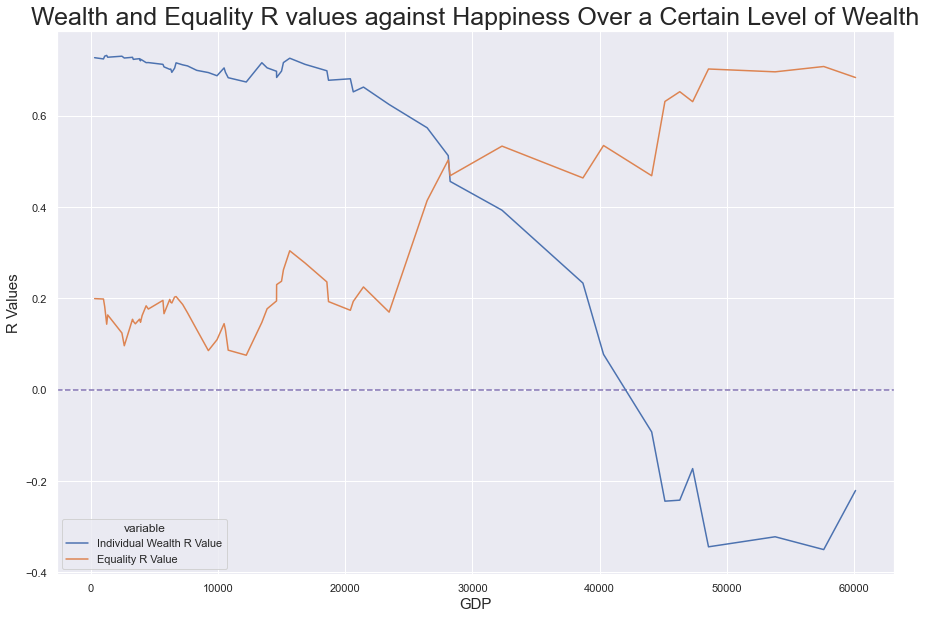

There are 17 countries for which equality provides a stronger R value for happiness
The minimum individual wealth in this set of countries is 28250.69777


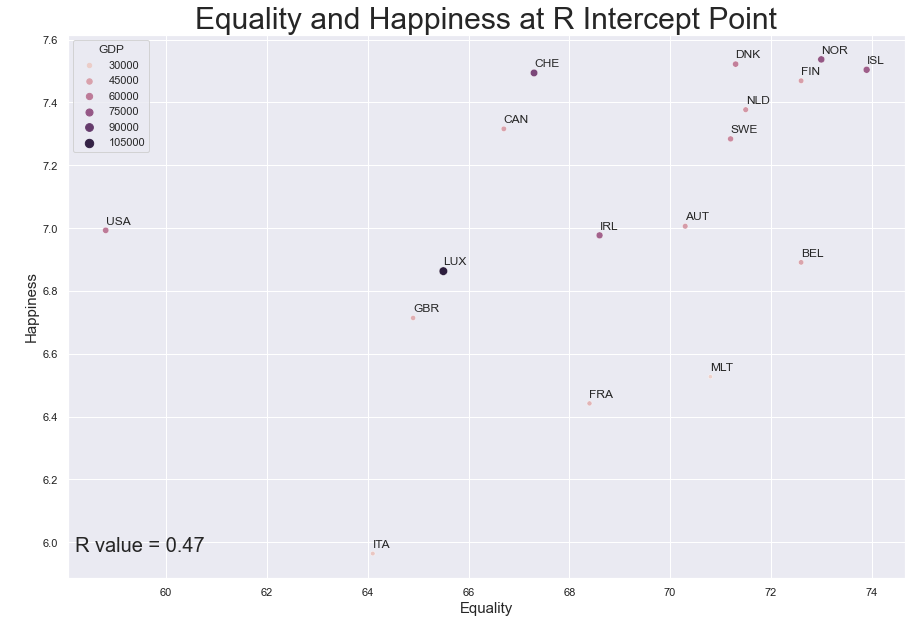

In [16]:
graphBundle(df_2017)

## Visualisation of 2018 Data

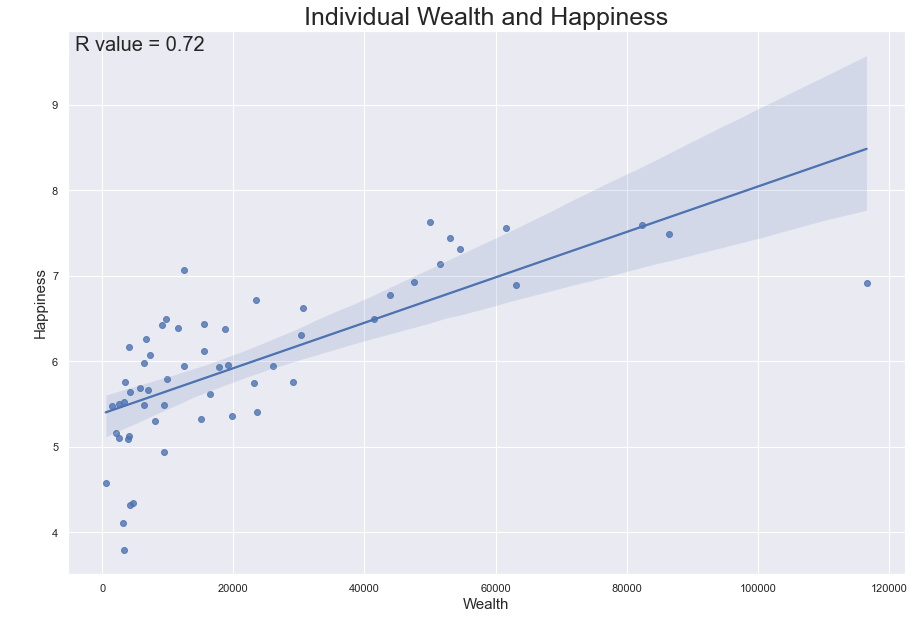

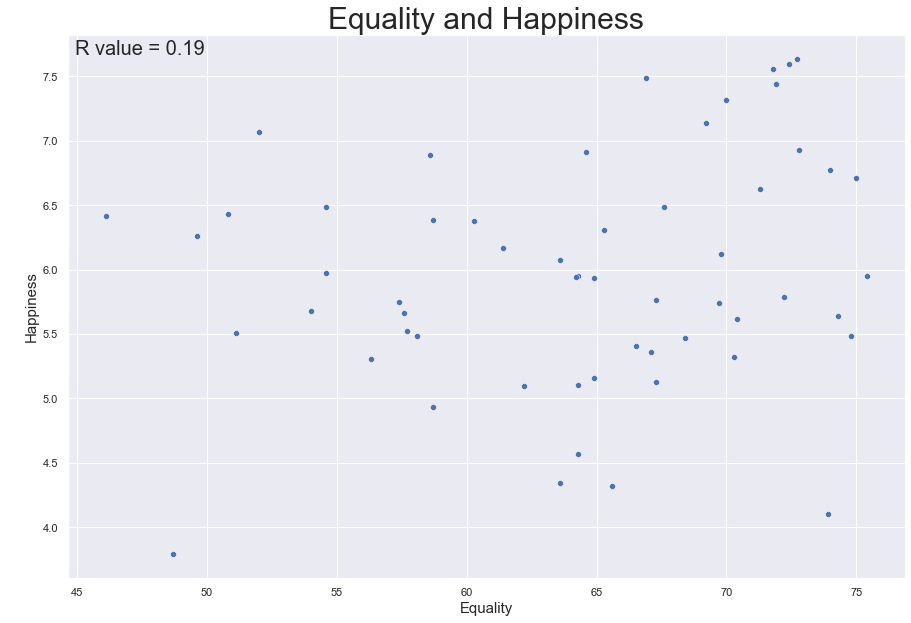

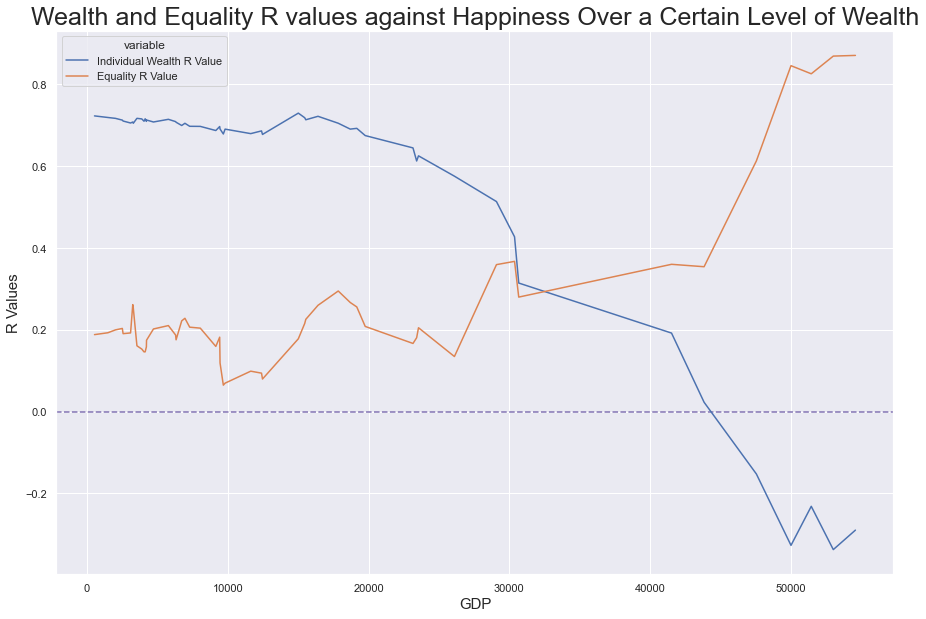

There are 12 countries for which equality provides a stronger R value for happiness
The minimum individual wealth in this set of countries is 41526.41466


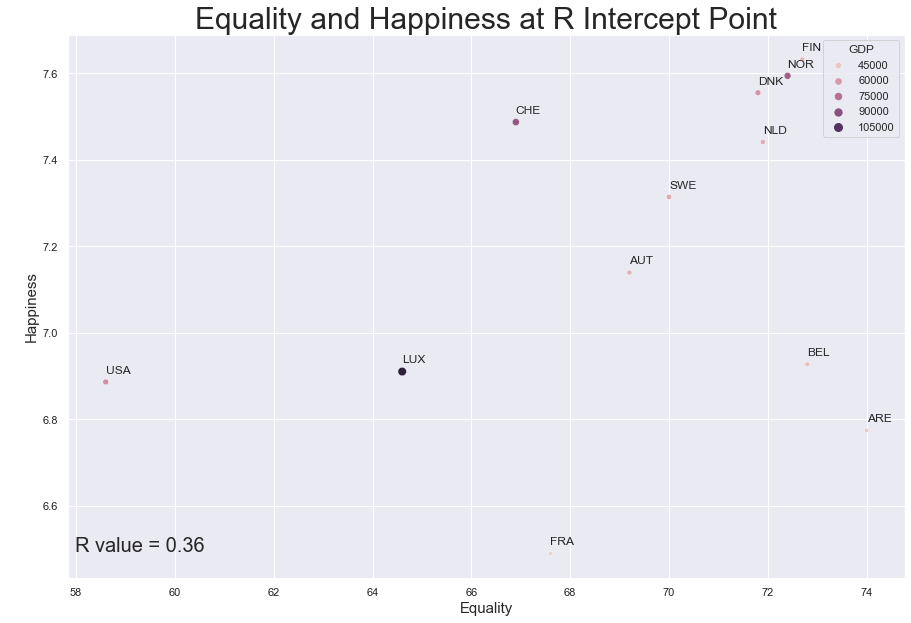

In [17]:
graphBundle(df_2018)

## Insights and Discussion

Every year's data that we have looked at shows the same basic story. As average individual wealth goes up in a country, so does happiness. However, as individual wealth increases, its positive impact on happiness diminishes. Not only that, but at a certain point, increasing wealth starts to have an adverse impact on happiness. These negative R values are weak, but consistent. 

At another certain point of wealth (the intercept point) in the data set, increasing equality has a stronger positive impact on happiness. As wealth continies to go up, this relationship tends to get more strongly positive.


We've seen that wealth seems to skew towards the lower end of the scale. Despite only filtering out countries below the intercept point (for example in 2015 Luxemberg and Switzerland have an average individual wealth of 101k and 85k respectively while the intercept point was 26k), we are have only been left with 12-19 data points out of the initial 60-70 points in each set. 

This indicates that for the majority of countries, increasing wealth can be a good bet for increasing happiness, still keeping in mind its diminishing returns.

It also means that we can be less confident about our discussions involving these richer countries. The insights above has been seen reliably over multiple years, but we see clusters of the same richer countries in them. Happiness is a complex topic, and without more data points over the global wealth midpoint to build a more robust model, there is a chance that each country's happiness differences can be explained by particular national or regional factors. 

However, in lieu of this analysis, the correlation between increasing equality and increasing happiness for wealthy countries is marked enough to not just be swept away. As more countries industrialise or become tertiary economies, there may be more countries above this intercept point to perform a more robust analysis. 

This analysis challenges the human value of a perpetual growth based economy. Leaders of wealthy countries should be mindful that chasing higher wealth can't be said to perpetually increase happiness. Other factors, including as per this analysis, economic equality, should be considered. On an international level, these leaders should also be mindful of greater happiness gains in poorer nations if support can be granted to help raise their average individual wealth. 


